In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Global Variables

In [2]:
RANDOM_STATE = 0

# Data Loading

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Data Shape

In [4]:
train.shape

(8523, 12)

In [5]:
test.shape

(5681, 11)

## Data Types

In [6]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                 

## Data Header

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Numerical Fields Summary

In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis

## Class Distribution

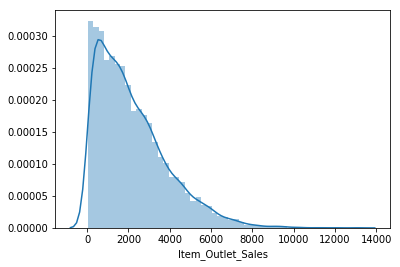

In [16]:
sns.distplot(train['Item_Outlet_Sales'])

In [17]:
print('Skewness: %f' % train['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %train['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtsis: 1.615877


## Missing Data

In [10]:
print('Train:', train.isnull().values.any())
print('Test:', test.isnull().values.any())

Train: True
Test: True


In [12]:
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Feature', 'Total']
missing_df['Percentage'] = ((missing_df['Total'] / train.shape[0])*100)
missing_df.sort_values('Percentage', ascending=False, inplace=True)
missing_df

,Feature,Total,Percentage
8,Outlet_Size,2410,28.276428
1,Item_Weight,1463,17.165317
0,Item_Identifier,0,0.000000
2,Item_Fat_Content,0,0.000000
3,Item_Visibility,0,0.000000
4,Item_Type,0,0.000000
5,Item_MRP,0,0.000000
6,Outlet_Identifier,0,0.000000
7,Outlet_Establishment_Year,0,0.000000
9,Outlet_Location_Type,0,0.000000


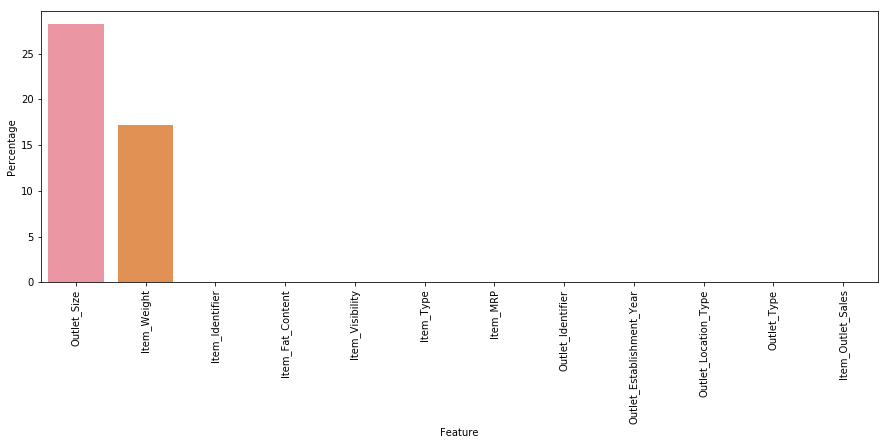

In [13]:
f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.barplot(x=missing_df['Feature'], y=missing_df['Percentage'])

## Imputing Missing Data 

### Train Data

In [22]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)
train['Outlet_Size'].fillna('Medium', inplace = True)

### Test Data

In [23]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace = True)
test['Outlet_Size'].fillna('Medium', inplace = True)

# Categorical Features Analysis

## Univariate Plots Distribution

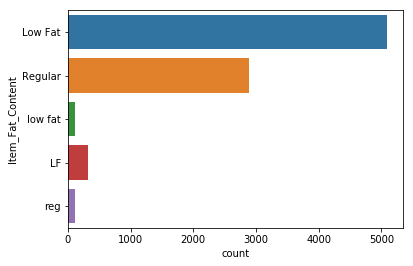

In [34]:
sns.countplot(y="Item_Fat_Content", data=train)

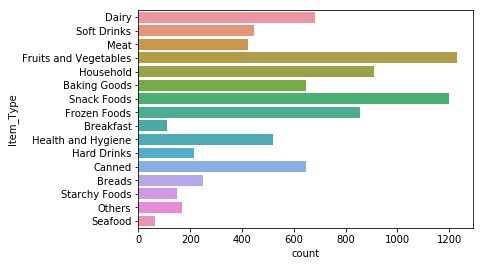

In [29]:
sns.countplot(y="Item_Type", data=train)

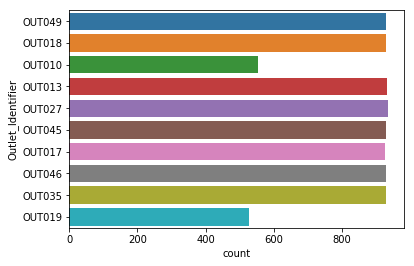

In [31]:
sns.countplot(y="Outlet_Identifier", data=train)

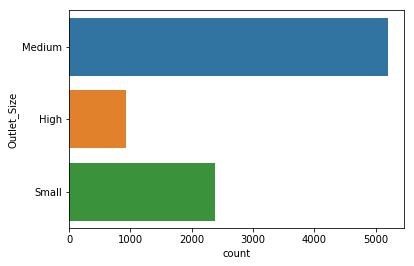

In [33]:
sns.countplot(y="Outlet_Size", data=train)

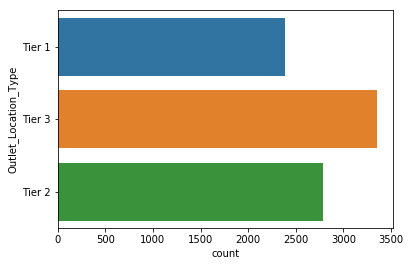

In [36]:
sns.countplot(y="Outlet_Location_Type", data=train)

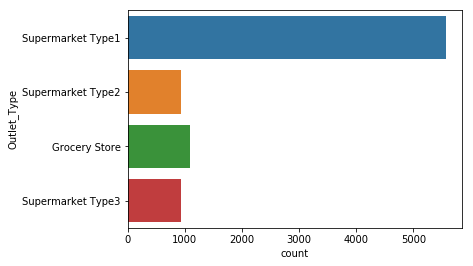

In [38]:
sns.countplot(y="Outlet_Type", data=train)

## Multivariate Plots Distribution

### Item_Type & Item_Fat_Content

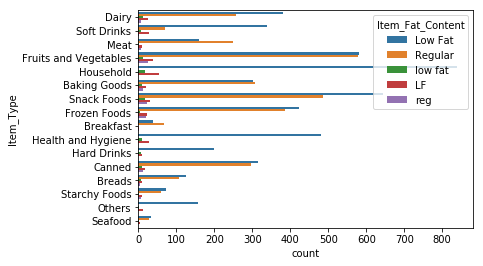

In [53]:
sns.countplot(y="Outlet_Size", hue='Item_Fat_Content', data=train)

### Outlet_Size & Outlet_Type

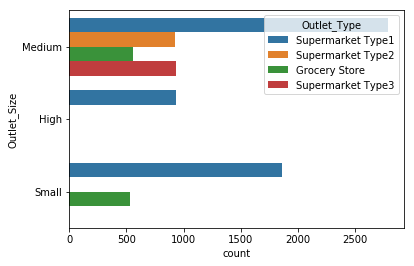

In [58]:
sns.countplot(y="Outlet_Size", hue='Outlet_Type', data=train)

### Outlet_Location_Type & Outlet_Size

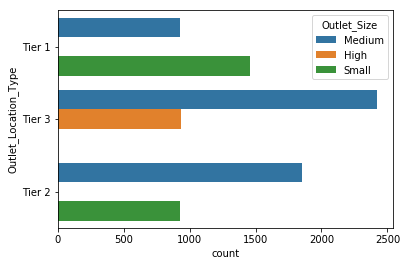

In [61]:
sns.countplot(y="Outlet_Location_Type", hue='Outlet_Size', data=train)

# Numerical Features Analysis

## Univariate Plots Distribution

### Distribution Plots